In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm # statsmodel 기본 import
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms 
import sklearn as sk
from patsy import dmatrix

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### sklearn을 활용한 분산분석 식 구하기

In [3]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=["X"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX0, dfy], axis=1)

model = sm.OLS.from_formula("Y~X", data=df)
result = model.fit()

In [4]:
print("TSS = ", result.uncentered_tss)
print("ESS = ", result.mse_model)
print("RSS = ", result.ssr)
print("ESS + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)

TSS =  291345.757898
ESS =  188589.613492
RSS =  102754.337551
ESS + RSS =  291343.951043
R squared =  0.647309178092


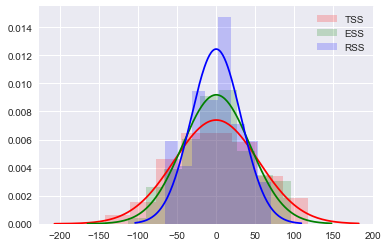

In [8]:
sns.distplot(y, kde=False, hist_kws={"color": "r", "alpha" : 0.2},
             fit=sp.stats.norm, fit_kws={"color" : "r"}, label="TSS") #TSS 그래프

sns.distplot(result.fittedvalues, kde=False, hist_kws={"color": "g", "alpha" : 0.2}, 
             fit=sp.stats.norm, fit_kws={"color" : "g"}, label="ESS")  #ESS 그래프

sns.distplot(result.resid, kde=False, hist_kws={"color": "b", "alpha" : 0.2}, 
             fit=sp.stats.norm, fit_kws={"color" : "b"}, label="RSS")  #RSS 그래프

plt.legend()  # 범례 표시
plt.show()



##### 회귀분석 F검정과 분산분석의 관계

In [9]:
sm.stats.anova_lm(result)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,188589.613492,188589.613492,179.863766,6.601482e-24
Residual,98.0,102754.337551,1048.513648,NaN,NaN


In [ ]:
# K = 2, N-K = 100-2 = 98, ESS = 188589.613492, RSS = 102754.337551, 
# sy^2 = ESS / K-1 = 188589.613492, se^2 = RSS / N-K  = 102754.337551 / 98 = 1048.513648
# F = sy^2 / se^2 = 188589.613492 / 1048.513648 = 179.863766

In [14]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           6.60e-24
Time:                        17:35:08   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

In [ ]:
# 위의 OLS Regression Results에서 F-statistics, Prob(F-statistic)이 보여짐.

##### 상수항이 없는 모형의 경우

In [15]:
X0, y, coef = make_regression(n_samples = 100, n_features = 1, noise = 30, bias = 100, coef=True, random_state=0)
dfX = pd.DataFrame(X0, columns=["X"])
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)   #상수항이 없기 때문에 sm.add_constant 명령을 하지 않았음.

model2 = sm.OLS.from_formula("Y~X + 0", data=df)  #상수항이 없기 때문에 모델에 + 0 을 넣어 준다.
result2 = model2.fit()

In [16]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     22.87
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           6.03e-06
Time:                        17:39:22   Log-Likelihood:                -604.91
No. Observations:                 100   AIC:                             1212.
Df Residuals:                      99   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X             48.8109     10.206      4.783      0.0

##### F검정을 이용한 모형 비교

In [17]:
from sklearn.datasets import load_boston

In [18]:
boston = load_boston()

In [24]:
dfX0_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns = ["MEDV"])
dfX_boston = sm.add_constant(dfX0_boston)
df_boston = pd.concat([dfX_boston, dfy_boston], axis = 1)

In [26]:
model_full = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD +\
                                 TAX + PTRATIO + B + LSTAT + CHAS", data = df_boston)
model_reduced = sm.OLS.from_formula("MEDV ~ CRIM + ZN + NOX + RM + DIS + RAD +\
                                 TAX + PTRATIO + B + LSTAT + CHAS", data = df_boston)
sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,494.0,11082.941389,0.0,NaN,NaN,NaN
1,492.0,11080.276284,2.0,2.665105,0.05917,0.942554


In [ ]:
# p-value = 94.2% : H0 ACCEPTED (model_reduced에서 제외된 INDUS, AGE의 w = 0)

##### F검정을 사용한 변수 중요도 비교

In [27]:
model_full = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD +\
                                 TAX + PTRATIO + B + LSTAT + CHAS", data = df_boston)
model_reduced = sm.OLS.from_formula("MEDV ~ ZN + INDUS + NOX + RM + AGE + DIS + RAD +\
                                 TAX + PTRATIO + B + LSTAT + CHAS", data = df_boston)
sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11322.004277,0.0,NaN,NaN,NaN
1,492.0,11080.276284,1.0,241.727993,10.733502,0.001126


In [ ]:
# CRIM : p-value 0.1%로 귀무가설 기각 불가, 중요도가 있는 변수임을 알 수 있음.

In [28]:
model_full = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD +\
                                 TAX + PTRATIO + B + LSTAT + CHAS", data = df_boston)
result_full = model_full.fit()
sm.stats.anova_lm(result_full, typ=2)

,sum_sq,df,F,PR(>F)
CRIM,241.727993,1.0,10.733502,1.126402e-03
ZN,257.226157,1.0,11.421671,7.836070e-04
INDUS,2.591314,1.0,0.115063,7.345971e-01
NOX,488.605951,1.0,21.695680,4.117296e-06
RM,1865.902935,1.0,82.852108,2.207486e-18
AGE,0.072792,1.0,0.003232,9.546859e-01
DIS,1232.544417,1.0,54.728947,6.017651e-13
RAD,478.172457,1.0,21.232399,5.189664e-06
TAX,242.053549,1.0,10.747958,1.117826e-03
PTRATIO,1195.939414,1.0,53.103567,1.268218e-12


In [ ]:
##### LSTAT, RM, DIS, PTRATIO순으로 p-value가 낮으므로 중요도가 높은 변수임.

##### 분산 분석을 이용한 카테고리 값의 영향 분석

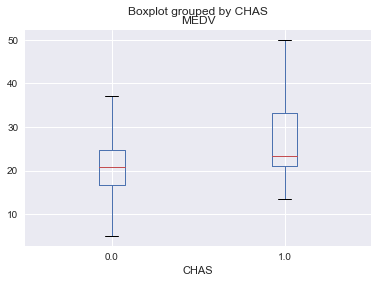

In [30]:
# 현재의 개별 카테고리 클래스들이 유의미한가 에 대한 분석
df_boston.boxplot("MEDV", "CHAS")
plt.show()

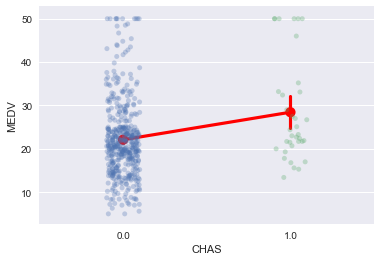

In [36]:
sns.stripplot(x="CHAS", y="MEDV", data=df_boston, jitter=True, alpha=.3)
sns.pointplot(x="CHAS", y="MEDV", data=df_boston, dodge=True, color="r")
plt.show()

In [37]:
model_chas = sm.OLS.from_formula("MEDV~C(CHAS)", data=df_boston)
sm.stats.anova_lm(model_chas.fit())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(CHAS),1.0,1312.079271,1312.079271,15.971512,0.000074
Residual,504.0,41404.216144,82.151223,NaN,NaN
